<center>
<h1> Sistema de Clasificación de Imagenes NASA
<h2> Inteligencia Artificial 
<h2> 2023 - 1
</center>

*Integrantes:*
- Jhon Alejandro Ramírez jramirezda@unal.edu.co
- Gerardo Sebastian Gil Sanchez ggil@unal.edu.co
- Nicolas Enrique Rodriguez Jurado	nerodriguezju@unal.edu.co
    
> Proyecto programado con la versión de <u>Python 3.9.13

En el presente estudio, se realizará la clasificación de imágenes utilizando redes neuronales convolucionales (CNN, por sus siglas en inglés). Se explorarán dos enfoques distintos: la creación de una red desde cero y el reentrenamiento de una red preentrenada mediante transfer learning. Estos métodos se aplicarán a un conjunto de datos compuesto por imágenes y etiquetas.

Las redes neuronales convolucionales son ampliamente utilizadas en tareas de visión por computadora, ya que son capaces de aprender patrones visuales y características relevantes en las imágenes. La creación de una red desde cero nos brinda la flexibilidad de diseñar la arquitectura a medida, mientras que el reentrenamiento de una red preentrenada permite aprovechar el conocimiento previo adquirido en conjuntos de datos masivos.

Para este estudio, se utilizará el conjunto de datos proporcionado en la siguiente [Imagenes orbital de Marte (HiRISE) conjunto de datos etiquetados versión 3.2](https://zenodo.org/record/4002935). Se trabajará en el preprocesamiento de las imágenes, la definición de las arquitecturas de las redes, el entrenamiento y la evaluación de los modelos resultantes.

## Descripción general de los datos

Este conjunto de datos contiene un total de 73,031 puntos de referencia. De estos, 10,433 puntos de referencia fueron detectados y extraídos de 180 imágenes de exploración de HiRISE, y 62,598 puntos de referencia fueron aumentados a partir de los 10,433 puntos de referencia originales.

Para cada punto de referencia original, se recortó una caja delimitadora cuadrada que incluye toda la extensión del punto de referencia más un margen de 30 píxeles a la izquierda, derecha, arriba y abajo. Cada punto de referencia recortado se redimensionó a 227x227 píxeles y luego se aumentó para generar 6 puntos de referencia adicionales utilizando los siguientes métodos:

Rotación de 90 grados en sentido horario
Rotación de 180 grados en sentido horario
Rotación de 270 grados en sentido horario
Volteo horizontal
Volteo vertical
Ajuste aleatorio de brillo
Este conjunto de datos es útil para la clasificación de imágenes de puntos de referencia en diferentes categorías. Los puntos de referencia se presentan como imágenes cuadradas de 227x227 píxeles, y cada imagen se ha aumentado para incluir variaciones en la orientación y el brillo. Además, se proporcionan etiquetas de clase para cada imagen, lo que permite la clasificación supervisada de los puntos de referencia utilizando técnicas de aprendizaje automático y de aprendizaje profundo.

las categorias que se usaron para etiquetar las imagenes son las siguientes: 

| Código | Descripción        |
|-------:|-------------------:|
|      0 |            other  |
|      1 |            crater |
|      2 |         dark dune |
|      3 |       slope streak |
|      4 |        bright dune |
|      5 |      impact ejecta |
|      6 |      swiss cheese  |
|      7 |   spider           |

En este proyecto, se utilizará un modelo preentrenado llamado VGG16 como base para realizar una tarea específica. El VGG16 es un modelo de red neuronal convolucional (CNN) ampliamente conocido y utilizado en la comunidad de aprendizaje profundo.

El objetivo es aprovechar el conocimiento previo del modelo VGG16, que ha sido entrenado en grandes conjuntos de datos de imágenes, para resolver nuestro problema específico. Sin embargo, se realizarán algunas modificaciones en el modelo para adaptarlo a nuestras necesidades.

En primer lugar, cargaremos el modelo VGG16 preentrenado sin incluir la capa densa superior. Esto significa que omitiremos la última capa completamente conectada del modelo, que se encarga de realizar predicciones específicas para el conjunto de datos original en el que se entrenó el modelo.

A continuación, congelaremos las capas existentes del modelo VGG16. Esto implica que no actualizaremos los pesos de estas capas durante el proceso de entrenamiento. Al congelar estas capas, evitamos que se modifiquen y nos permiten utilizar el conocimiento aprendido previamente en tareas similares.

Después de congelar las capas existentes, agregaremos capas adicionales al modelo. Estas capas adicionales se conectarán a la salida del modelo VGG16 y nos permitirán adaptar el modelo a nuestra tarea específica. En este caso, utilizaremos una capa de agrupamiento global promedio (Global Average Pooling), una capa de aplanamiento (Flatten), una capa densa con activación ReLU y una capa de dropout para regularización. Finalmente, agregaremos una capa densa de salida con activación softmax que producirá las predicciones finales para nuestras clases de interés.

El modelo final resultante se construirá utilizando las capas modificadas y se utilizará para reentrenar las últimas 10 capas del modelo. Estas capas se actualizarán durante el proceso de entrenamiento para adaptarse a nuestro conjunto de datos y resolver nuestra tarea específica.

Las modificaciones realizadas nos permiten aprovechar el conocimiento previo del modelo VGG16, mientras adaptamos el modelo a nuestra tarea específica. Al reentrenar las últimas capas, permitimos que el modelo se ajuste a nuestro conjunto de datos y aprenda a realizar predicciones precisas para nuestras clases de interés.

A través de este enfoque de transferencia de aprendizaje con el modelo VGG16 y las modificaciones realizadas, esperamos obtener un modelo eficiente y preciso para nuestra tarea específica.

In [5]:
import os
datos=os.listdir("C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/map-proj-v3_2")
print(len(datos))
print(datos)

32182
['ESP_011283_2265_RED-0013-fv.jpg', 'ESP_011283_2265_RED-0013-r180.jpg', 'ESP_011283_2265_RED-0017-brt.jpg', 'ESP_011283_2265_RED-0017-fv.jpg', 'ESP_011283_2265_RED-0017-r270.jpg', 'ESP_011283_2265_RED-0017-r90.jpg', 'ESP_011283_2265_RED-0030-brt.jpg', 'ESP_011283_2265_RED-0030-fh.jpg', 'ESP_011283_2265_RED-0030-r180.jpg', 'ESP_011283_2265_RED-0030-r90.jpg', 'ESP_011283_2265_RED-0030.jpg', 'ESP_011289_1950_RED-0015.jpg', 'ESP_011289_1950_RED-0039.jpg', 'ESP_011289_1950_RED-0058.jpg', 'ESP_011289_1950_RED-0063.jpg', 'ESP_011289_1950_RED-0066.jpg', 'ESP_011289_1950_RED-0067.jpg', 'ESP_011289_1950_RED-0070.jpg', 'ESP_011289_1950_RED-0076.jpg', 'ESP_011289_1950_RED-0098.jpg', 'ESP_011289_1950_RED-0099.jpg', 'ESP_011289_1950_RED-0100.jpg', 'ESP_011289_1950_RED-0101.jpg', 'ESP_011289_1950_RED-0102.jpg', 'ESP_011289_1950_RED-0104.jpg', 'ESP_011289_1950_RED-0112.jpg', 'ESP_011289_1950_RED-0138.jpg', 'ESP_011289_1950_RED-0139.jpg', 'ESP_011289_1950_RED-0162.jpg', 'ESP_011289_1950_RED-0166

In [6]:
import cv2
import numpy as np
import os
import csv

carpeta_imagenes = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/map-proj-v3_2"

# Lista de nombres de archivos
nombres_archivos = os.listdir(carpeta_imagenes)

# Ruta del archivo CSV con los nombres de imágenes, etiquetas y categorías
ruta_archivo_csv = "C:/Users/User/Documents/Proyecto/hirise-map-proj-v3_2/hirise-map-proj-v3_2/labels-map-proj_v3_2_train_val_test.csv"

# Diccionarios para almacenar las imágenes y etiquetas de train, test y val
imagenes_train = {}
etiquetas_train = {}
imagenes_test = {}
etiquetas_test = {}
imagenes_val = {}
etiquetas_val = {}

# Leer el archivo CSV
with open(ruta_archivo_csv, "r") as file:
    csv_reader = csv.reader(file, delimiter=',')
    for row in csv_reader:
        nombre_imagen, etiqueta, categoria = row

        # Verificar si el nombre de la imagen está en la lista de nombres de archivos
        if nombre_imagen in nombres_archivos:
            ruta_imagen = os.path.join(carpeta_imagenes, nombre_imagen)
            imagen = cv2.imread(ruta_imagen)
            etiqueta = int(etiqueta)

            # Asignar la imagen y etiqueta a la categoría correspondiente
            if categoria == "train":
                imagenes_train[nombre_imagen] = imagen
                etiquetas_train[nombre_imagen] = etiqueta
            elif categoria == "test":
                imagenes_test[nombre_imagen] = imagen
                etiquetas_test[nombre_imagen] = etiqueta
            elif categoria == "val":
                imagenes_val[nombre_imagen] = imagen
                etiquetas_val[nombre_imagen] = etiqueta

# Convertir los diccionarios a listas de numpy
imagenes_train = np.array(list(imagenes_train.values()))
etiquetas_train = np.array(list(etiquetas_train.values()))
imagenes_test = np.array(list(imagenes_test.values()))
etiquetas_test = np.array(list(etiquetas_test.values()))
imagenes_val = np.array(list(imagenes_val.values()))
etiquetas_val = np.array(list(etiquetas_val.values()))

In [7]:
import numpy as np

# Calcular el promedio de datos por categoría (excluyendo la categoría 0)
promedio_datos_train = int(np.mean(np.bincount(etiquetas_train[etiquetas_train != 0])))
promedio_datos_test = int(np.mean(np.bincount(etiquetas_test[etiquetas_test != 0])))
promedio_datos_val = int(np.mean(np.bincount(etiquetas_val[etiquetas_val != 0])))


# Seleccionar índices aleatorios de la categoría 0 train
indices_categoria_0_train = np.where(etiquetas_train == 0)[0]
indices_seleccionados_train = np.random.choice(indices_categoria_0_train, size=promedio_datos_train, replace=False)
# Seleccionar índices aleatorios de la categoría 0 test
indices_categoria_0_test = np.where(etiquetas_test == 0)[0]
indices_seleccionados_test = np.random.choice(indices_categoria_0_test, size=promedio_datos_test, replace=False)
# Seleccionar índices aleatorios de la categoría 0 validacion
indices_categoria_0_val = np.where(etiquetas_val == 0)[0]
indices_seleccionados_val = np.random.choice(indices_categoria_0_val, size=promedio_datos_val, replace=False)

# Obtener los datos seleccionados para la categoría 0 en los conjuntos de entrenamiento, prueba y validación
nuevas_imagenes_train = imagenes_train[np.concatenate((indices_seleccionados_train, np.where(etiquetas_train != 0)[0]))]
nuevas_etiquetas_train = etiquetas_train[np.concatenate((indices_seleccionados_train, np.where(etiquetas_train != 0)[0]))]

nuevas_imagenes_test = imagenes_test[np.concatenate((indices_seleccionados_test, np.where(etiquetas_test != 0)[0]))]
nuevas_etiquetas_test = etiquetas_test[np.concatenate((indices_seleccionados_test, np.where(etiquetas_test != 0)[0]))]

nuevas_imagenes_val = imagenes_val[np.concatenate((indices_seleccionados_val, np.where(etiquetas_val != 0)[0]))]
nuevas_etiquetas_val = etiquetas_val[np.concatenate((indices_seleccionados_val, np.where(etiquetas_val != 0)[0]))]

In [8]:
print(len(nuevas_imagenes_train),len(nuevas_etiquetas_train),len(nuevas_imagenes_test),len(nuevas_etiquetas_test),len(nuevas_imagenes_val),len(nuevas_etiquetas_val))

4945 4945 182 182 1634 1634


In [9]:
import numpy as np
# Normalización de los lotes de imágenes
nuevas_imagenes_train = nuevas_imagenes_train.astype('float32') / 255.0
nuevas_imagenes_test = nuevas_imagenes_test.astype('float32') / 255.0
nuevas_imagenes_val = nuevas_imagenes_val.astype('float32') / 255.0

In [13]:
from tensorflow.keras.applications import VGG16

# Cargar el modelo VGG16 preentrenado sin incluir la capa densa superior
vgg16 = VGG16(weights='imagenet', include_top=True)

# Resumen del modelo
vgg16.summary()

553467096/553467096 [==============================] - 49s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D as global_average_pooling2D
from tensorflow.keras.models import Model

# Cargar el modelo VGG16 preentrenado sin incluir la capa densa superior
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(227, 227, 3))
# Congelar las capas existentes del modelo VGG16
for layer in vgg16.layers:
    layer.trainable = False

# Agregar capas adicionales al modelo
x = global_average_pooling2D()(vgg16.output)
x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(8, activation='softmax')(x)

# Construir el modelo final
model = Model(inputs=vgg16.input, outputs=predictions)

# Resumen del modelo
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
# Compilar el modelo
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(nuevas_imagenes_train, nuevas_etiquetas_train, epochs=10, batch_size=32, validation_data=(nuevas_imagenes_val, nuevas_etiquetas_val))

Epoch 1/10
155/155 [==============================] - 406s 3s/step - loss: 1.0793 - accuracy: 0.6502 - val_loss: 1.0425 - val_accuracy: 0.6548
Epoch 2/10
155/155 [==============================] - 397s 3s/step - loss: 0.6712 - accuracy: 0.7709 - val_loss: 1.0575 - val_accuracy: 0.6763
Epoch 3/10
155/155 [==============================] - 405s 3s/step - loss: 0.5925 - accuracy: 0.7951 - val_loss: 0.9673 - val_accuracy: 0.6750
Epoch 4/10
155/155 [==============================] - 393s 3s/step - loss: 0.5555 - accuracy: 0.8000 - val_loss: 1.0704 - val_accuracy: 0.6897
Epoch 5/10
155/155 [==============================] - 394s 3s/step - loss: 0.5009 - accuracy: 0.8180 - val_loss: 1.0470 - val_accuracy: 0.6616
Epoch 6/10
155/155 [==============================] - 397s 3s/step - loss: 0.4637 - accuracy: 0.8342 - val_loss: 1.0659 - val_accuracy: 0.6879
Epoch 7/10
155/155 [==============================] - 396s 3s/step - loss: 0.4278 - accuracy: 0.8376 - val_loss: 1.0254 - val_accuracy: 0.6836

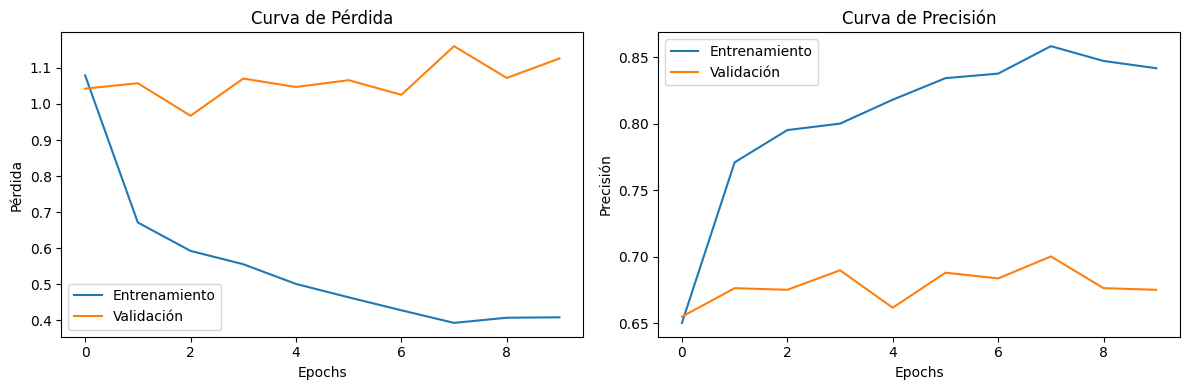

In [17]:
# Visualizar las curvas de pérdida y precisión
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Guardar el modelo en un archivo HDF5
model.save('modelo_vgg16.h5')

In [19]:
# Cargar el modelo desde el archivo HDF5
model_cargado = tf.keras.models.load_model('modelo_vgg16.h5')

In [20]:
# Congelar todas las capas del modelo cargado
for layer in model_cargado.layers:
    layer.trainable = False

# Descongelar las últimas 10 capas del modelo
for layer in model_cargado.layers[-10:]:
    layer.trainable = True

# Compilar el modelo
model_cargado.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo modificado
model_cargado.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# Compilar el modelo
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
import tensorflow as tf

# Configurar el uso de GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)

# Entrenar el modelo
history = model.fit(nuevas_imagenes_train, nuevas_etiquetas_train, epochs=10, batch_size=32, validation_data=(nuevas_imagenes_val, nuevas_etiquetas_val))

Epoch 1/10
155/155 [==============================] - 402s 3s/step - loss: 0.3786 - accuracy: 0.8560 - val_loss: 1.2474 - val_accuracy: 0.6665
Epoch 2/10
155/155 [==============================] - 398s 3s/step - loss: 0.3387 - accuracy: 0.8698 - val_loss: 1.3104 - val_accuracy: 0.6842
Epoch 3/10
155/155 [==============================] - 395s 3s/step - loss: 0.3754 - accuracy: 0.8568 - val_loss: 1.1921 - val_accuracy: 0.6903
Epoch 4/10
155/155 [==============================] - 402s 3s/step - loss: 0.3224 - accuracy: 0.8730 - val_loss: 1.1364 - val_accuracy: 0.7013
Epoch 5/10
155/155 [==============================] - 395s 3s/step - loss: 0.3046 - accuracy: 0.8819 - val_loss: 1.2399 - val_accuracy: 0.6922
Epoch 6/10
155/155 [==============================] - 400s 3s/step - loss: 0.3059 - accuracy: 0.8805 - val_loss: 1.1881 - val_accuracy: 0.6818
Epoch 7/10
155/155 [==============================] - 397s 3s/step - loss: 0.2723 - accuracy: 0.8948 - val_loss: 1.2839 - val_accuracy: 0.6732

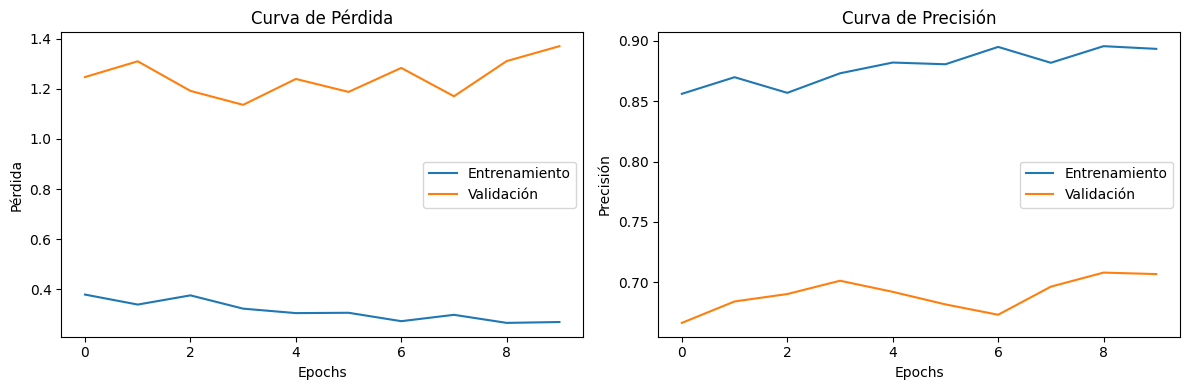

In [24]:
# Visualizar las curvas de pérdida y precisión
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Epochs')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Curva de Precisión')
plt.xlabel('Epochs')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
# Guardar el modelo en un archivo HDF5
model.save('modelo_vgg16new.h5')

In [2]:
import tensorflow as tf
# Cargar el modelo desde el archivo HDF5
model_cargado = tf.keras.models.load_model('modelo_vgg16new.h5')

## Tests 

6/6 [==============================] - 12s 2s/step
Exactitud: 71.43%


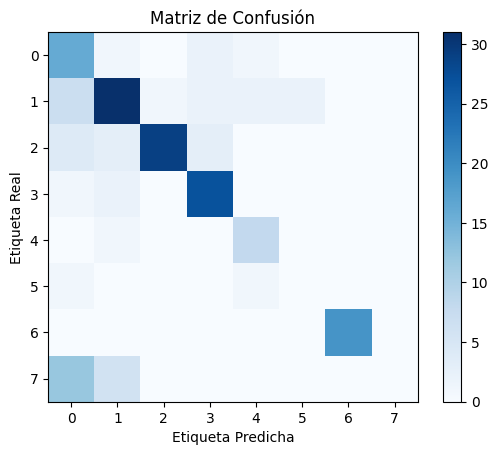

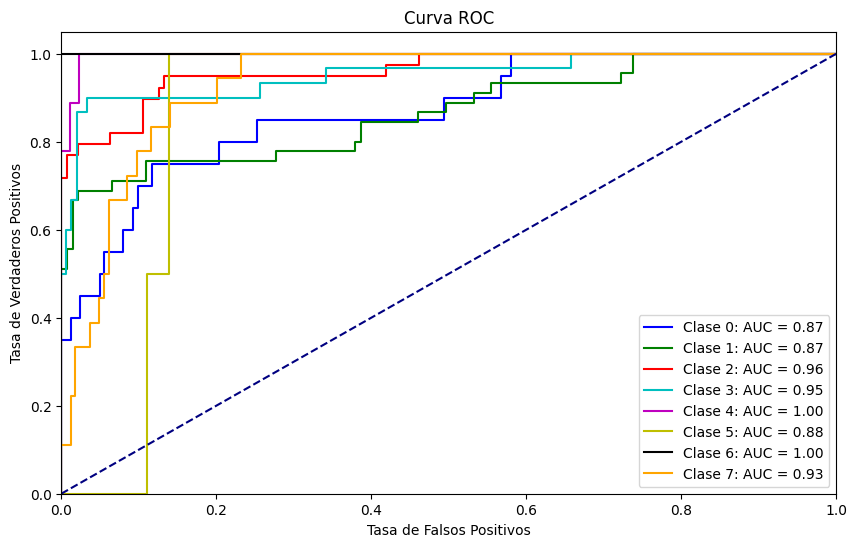

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar predicciones con el modelo
predicciones = model_cargado.predict(nuevas_imagenes_test)

# Obtener las etiquetas predichas
etiquetas_predichas = np.argmax(predicciones, axis=1)

# Calcular la precisión
exactitud = np.sum(etiquetas_predichas == nuevas_etiquetas_test) / len(nuevas_etiquetas_test)
print("Exactitud: {:.2f}%".format(exactitud * 100))

# Graficar matriz de confusión
confusion_matrix = tf.math.confusion_matrix(nuevas_etiquetas_test, etiquetas_predichas)
labels = np.unique(nuevas_etiquetas_test)
plt.imshow(confusion_matrix, cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.colorbar()
plt.show()

# Graficar curva ROC
from sklearn.metrics import roc_curve, auc

num_clases = len(labels)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_clases):
    fpr[i], tpr[i], _ = roc_curve(nuevas_etiquetas_test == i, predicciones[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i in range(num_clases):
    plt.plot(fpr[i], tpr[i], color=colors[i], label='Clase {}: AUC = {:.2f}'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Matriz de Confusión:
La matriz de confusión es una herramienta visual que muestra el desempeño del modelo en la clasificación de las etiquetas de prueba. En el eje x de la matriz, encontrarás las etiquetas predichas por el modelo, mientras que en el eje y encontrarás las etiquetas reales de los datos de prueba. Cada celda de la matriz representa el recuento de la cantidad de muestras que se clasificaron en una determinada etiqueta predicha y etiqueta real.

La diagonal principal de la matriz (de arriba a la izquierda a abajo a la derecha) representa las clasificaciones correctas, mientras que las celdas fuera de la diagonal principal representan las clasificaciones incorrectas. La intensidad del color en cada celda indica el recuento de muestras clasificadas.

La matriz de confusión te permite evaluar rápidamente cómo se está desempeñando el modelo en términos de verdaderos positivos, verdaderos negativos, falsos positivos y falsos negativos para cada clase. Puedes usar esta información para comprender en qué clases el modelo tiene un buen desempeño y en cuáles puede haber confusión.

### Curva ROC (Receiver Operating Characteristic):
La curva ROC es una representación gráfica del desempeño de un modelo de clasificación binaria. En el eje x se representa la tasa de falsos positivos (FPR) y en el eje y se representa la tasa de verdaderos positivos (TPR), también conocida como sensibilidad o tasa de aciertos.

Cada punto en la curva ROC representa un umbral de clasificación diferente. Al mover el umbral de clasificación, se obtienen diferentes valores de TPR y FPR. La curva ROC traza la relación entre estas dos tasas a medida que el umbral varía de 0 a 1.

Cuanto más cercana esté la curva ROC al vértice superior izquierdo del gráfico, mejor será el desempeño del modelo. Un área bajo la curva (AUC) igual a 1 indica un modelo perfecto, mientras que un AUC igual a 0.5 indica un rendimiento aleatorio.

Puedes utilizar la curva ROC para evaluar y comparar diferentes modelos, y elegir aquel que tenga un mejor desempeño en términos de equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos.